In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score as cv_score

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
matplotlib.style.use('ggplot')


### Data import and processing

In [2]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [3]:
train.index = list(train['Id'])
train.index.name = 'ID'
del train['Id']

test.index = list(test['Id'])
test.index.name = 'ID'
del test['Id']


In [4]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
ID,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
ID,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [6]:
total_NaN = train.isna().sum()
drop_column = total_NaN[total_NaN>train.shape[0]/4]

In [7]:
for drop in drop_column.index:
    del train[drop]
    del test[drop]

In [8]:
le = LabelEncoder()
categorical_features = train.select_dtypes(include=["object"]).columns.values
for column in categorical_features:
    train[column] = le.fit_transform(list(train[column]))
    test[column] = le.fit_transform(list(test[column]))

In [9]:
Train = pd.DataFrame(SimpleImputer().fit_transform(train[[x for x in train.columns if x != 'SalePrice']]))
Train.columns = test.columns
Train.index = train.index

In [10]:
Test = pd.DataFrame(SimpleImputer().fit_transform(test))
Test.columns = test.columns
Test.index = test.index

norm = normalize(SimpleImputer().fit_transform(train[[x for x in train.columns if x != 'SalePrice']]))
Train = pd.DataFrame(norm)
Train.columns = test.columns
Train.index = train.index

norm = normalize(SimpleImputer().fit_transform(test))
Test = pd.DataFrame(norm)
Test.columns = test.columns
Test.index = test.index

### Choosing features (using model)

In [11]:
model = LinearRegression(normalize=True)
y = train['SalePrice']
scores = pd.DataFrame()

In [12]:
for column in list(Train.columns):
    X = Train[column].values.reshape(-1, 1)
    model.fit(X, y)
    scores[column] = [model.score(X, y)]

In [13]:
scores = scores.transpose()
scores.columns = ['score']

In [14]:
list(scores.sort_values('score', ascending = False).index)

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'ExterQual',
 'GarageArea',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'KitchenQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'GarageYrBlt',
 'Fireplaces',
 'GarageType',
 'HeatingQC',
 'BsmtFinSF1',
 'Foundation',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'BsmtExposure',
 'HalfBath',
 'LotArea',
 'LotShape',
 'CentralAir',
 'Electrical',
 'PavedDrive',
 'BsmtFullBath',
 'RoofStyle',
 'BsmtUnfSF',
 'SaleCondition',
 'Neighborhood',
 'HouseStyle',
 'BedroomAbvGr',
 'MSZoning',
 'KitchenAbvGr',
 'RoofMatl',
 'EnclosedPorch',
 'ExterCond',
 'Functional',
 'ScreenPorch',
 'Exterior2nd',
 'Exterior1st',
 'BsmtFinType1',
 'Heating',
 'PoolArea',
 'Condition1',
 'BldgType',
 'MSSubClass',
 'OverallCond',
 'LotConfig',
 'SaleType',
 'LandSlope',
 'MoSold',
 '3SsnPorch',
 'Street',
 'MasVnrType',
 'YrSold',
 'LowQualFinSF',
 'GarageCond',
 'MiscVal',
 'BsmtHalfBath',
 'LandCont

In [15]:
features1 = list(scores.sort_values('score', ascending = False).head().index)
features1

['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea']

### Choosing features (Add-Del greedy algorithm)

In [16]:
Train.columns.shape[0]

74

In [17]:
features2 = [features1[0]]

In [18]:
def ADD(features, train, y):
    
    model = LinearRegression()
    columns = [x for x in list(train.columns) if (x not in features)]
    score = []
    for column in columns:
        f = features.copy()
        f.append(column)
        X = train[f]
        model.fit(X, y)
        score.append(model.score(X, y))
    best = columns[score.index(max(score))]
    features.append(best)
    
    return (features, max(score))

In [19]:
def DEL(features, train, y):
    
    model = LinearRegression()
    score = []
    for column in features:
        f = features.copy()
        f.remove(column)
        X = train[f]
        model.fit(X, y)
        score.append(model.score(X, y))
    worst = features[score.index(max(score))]
    features.remove(worst)
    
    return (features, max(score))

In [20]:
model.fit(Train[features2].values.reshape(-1, 1),y)
current = model.score(Train[features2].values.reshape(-1, 1),y)

In [21]:
not_finish = True

In [22]:
while not_finish:
    f, score = ADD(features2.copy(), Train, y)
    if score > current:
        features2 = f
        current = score
    else:
        not_finish = False

In [23]:
not_finish = True

In [24]:
while not_finish:
    f, score = DEL(features2.copy(), Train, y)
    if score > current:
        features2 = f
        current = score
    else:
        not_finish = False

In [25]:
len(features2)

73

Only 1 feature was deleted / was't selected. Repeating of ADD-DEl did not change anything. (Even DEL wasn't necessary)

### Choosing features (PCA)

In [84]:
pca = PCA(n_components = 4) #also were used n = 2, n = 3 and n=5
train_PCA = pca.fit_transform(Train)    
test_PCA = pca.fit_transform(Test)

### Predictions

In [33]:
def predict(X, X_test, y, num):
    
    model.fit(X, y)
    y_predict = model.predict(X_test)
    
    name = 'result' + str(num) + '.csv'
    result = pd.DataFrame(y_predict)
    result.columns = ['SalePrice']
    result.index = X_test.index
    result.to_csv(name, sep=',', 
                  index_label = 'Id', header = True)
    
    return np.mean(cv_score(model, X, y, cv=5) )

In [76]:
CVs = []
CVs.append(predict(Train[features1], 
    Test[features1], 
    train['SalePrice'], 1))

In [77]:
CVs.append(predict(Train[features2], 
    Test[features2], 
    train['SalePrice'], 2))

In [85]:
model.fit(train_PCA,y)
y_PCA = model.predict(test_PCA)
result = pd.DataFrame(y_PCA)
result.columns = ['SalePrice']
result.index = Test.index
result.to_csv("result_PCA.csv", sep=',', 
              index_label = 'Id', header = True)

CVs.append(np.mean(cv_score(model, train_PCA, y, cv=5)))

### Plot of metrics

In [86]:
CVs

[0.7552084879359027,
 -55639866.958809115,
 0.6151993543850949,
 0.6149417405909297,
 0.6258026979740285,
 0.6212983072007549]

ADD-Del has some problems that I can't explain

In [87]:
KGscore = [0.21745, 0.34071, 0.30244 ,0.29996, 0.29283, 0.41148] 

In [88]:
Metrics = pd.DataFrame([CVs, KGscore], index = ['Cross_Val', 'Kaggle'], 
                       columns = ['Model_select', 'ADD-DEL_select', 'PCA_select 2','PCA_select 3','PCA_select 4','PCA_select 5'])

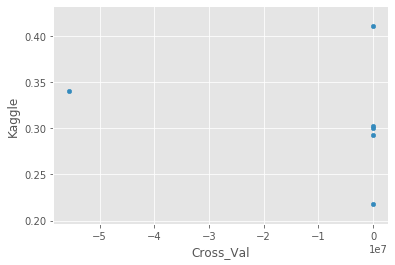

In [89]:
Metrics.transpose().plot.scatter(x='Cross_Val', y='Kaggle');